## Air Quality Index Analysis

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10872 entries, 0 to 10871
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             10872 non-null  object 
 1   Hour             10872 non-null  int64  
 2   Central/Western  10871 non-null  float64
 3   Southern         10872 non-null  int64  
 4   Eastern          10872 non-null  int64  
 5   Kwun Tong        10872 non-null  int64  
 6   Sham Shui Po     10872 non-null  int64  
 7   Kwai Chung       10872 non-null  int64  
 8   Tsuen Wan        10872 non-null  int64  
 9   Tseung Kwan O    10872 non-null  int64  
 10  Yuen Long        10870 non-null  float64
 11  Tuen Mun         10864 non-null  float64
 12  Tung Chung       10869 non-null  float64
 13  Tai Po           10872 non-null  int64  
 14  Sha Tin          10872 non-null  int64  
 15  North            10872 non-null  int64  
 16  Tap Mun          10742 non-null  float64
 17  

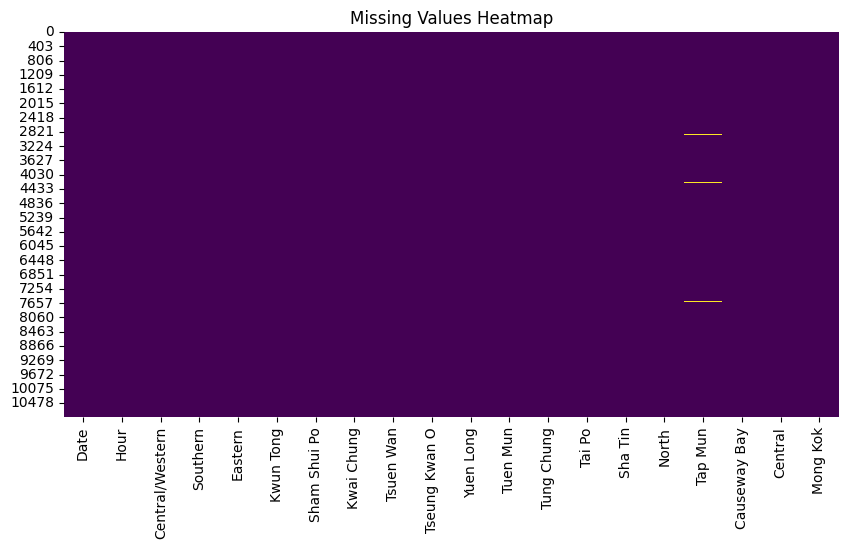

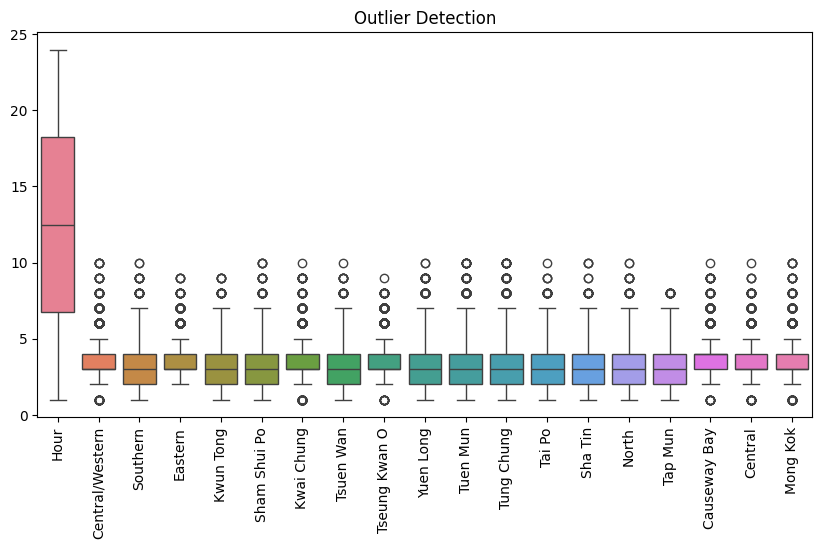

Index(['Date', 'Hour', 'Central/Western', 'Southern', 'Eastern', 'Kwun Tong',
       'Sham Shui Po', 'Kwai Chung', 'Tsuen Wan', 'Tseung Kwan O', 'Yuen Long',
       'Tuen Mun', 'Tung Chung', 'Tai Po', 'Sha Tin', 'North', 'Tap Mun',
       'Causeway Bay', 'Central', 'Mong Kok'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df_aqi = pd.read_csv("../data/air_quality_index.csv") 
column_names = ['Central/Western', 'Southern', 'Eastern', 'Kwun Tong',
       'Sham Shui Po', 'Kwai Chung', 'Tsuen Wan', 'Tseung Kwan O', 'Yuen Long',
       'Tuen Mun', 'Tung Chung', 'Tai Po', 'Sha Tin', 'North', 'Tap Mun',
       'Causeway Bay', 'Central', 'Mong Kok']
# Handle NA string and filter negative value
for column in column_names:
    df_aqi[column] = pd.to_numeric(df_aqi[column], errors='coerce')
    df_aqi[column] = df_aqi[column].apply(lambda x: x if x >= 0 else None)

# Check basic info
print("Basic Info:")
print(df_aqi.info())

# Summary statistics
print("\nSummary Statistics:")
# print(df_aqi.describe(include="all"))  # Show stats for numerical & categorical

# Check missing values
print("\nMissing Values:")
print(df_aqi.isnull().sum())

# Check duplicate rows
print("\nDuplicate Rows:", df_aqi.duplicated().sum())

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df_aqi.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Check outliers using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_aqi.select_dtypes(include=["number"]))  # Only numeric columns
plt.xticks(rotation=90)
plt.title("Outlier Detection")
plt.show()


print(df_aqi.columns)
    

## Data Cleansing

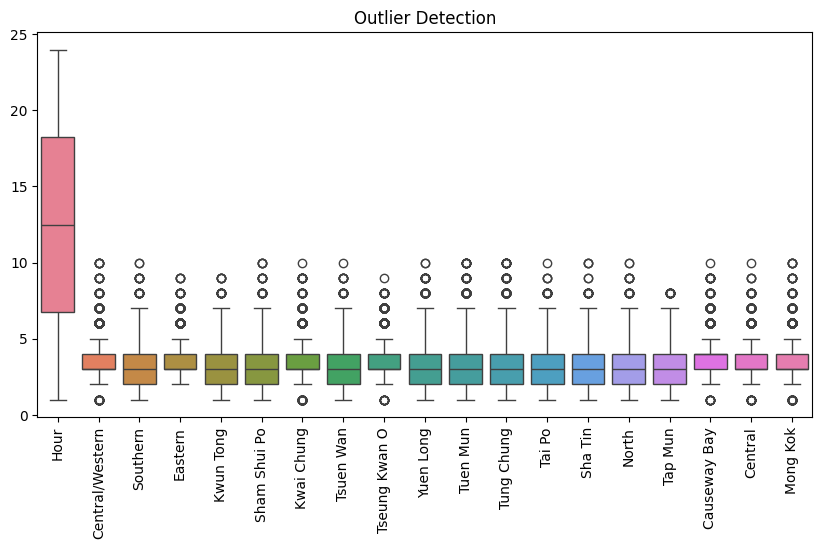


Records count: 10872

Missing Records:
Date               0
Hour               0
Central/Western    0
Southern           0
Eastern            0
Kwun Tong          0
Sham Shui Po       0
Kwai Chung         0
Tsuen Wan          0
Tseung Kwan O      0
Yuen Long          0
Tuen Mun           0
Tung Chung         0
Tai Po             0
Sha Tin            0
North              0
Tap Mun            0
Causeway Bay       0
Central            0
Mong Kok           0
dtype: int64

Duplicate Rows: 0
Column: Central/Western, Min: 1.0, Max: 10.0 , Mean:3.5030353200883004
Column: Southern, Min: 1, Max: 10 , Mean:3.4345106696100074
Column: Eastern, Min: 2, Max: 9 , Mean:3.5756070640176603
Column: Kwun Tong, Min: 1, Max: 9 , Mean:3.4311074319352466
Column: Sham Shui Po, Min: 1, Max: 10 , Mean:3.4438925680647534
Column: Kwai Chung, Min: 1, Max: 10 , Mean:3.420805739514349
Column: Tsuen Wan, Min: 1, Max: 10 , Mean:3.257358351729213
Column: Tseung Kwan O, Min: 1, Max: 9 , Mean:3.501747608535688
Column: Yue

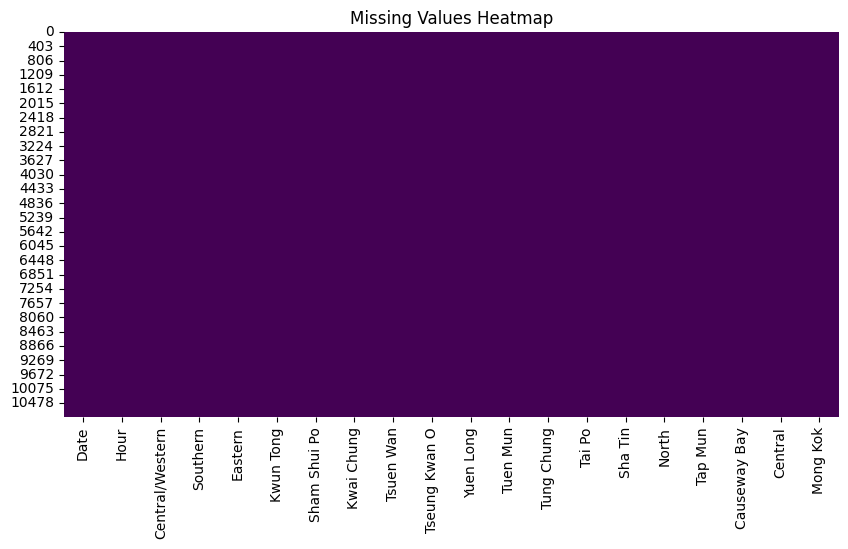

In [ ]:
# Remove Outlier
# df_aqi_filtered = remove_outliers_quantile(df_aqi,column_names)
df_aqi_filtered = df_aqi    

# Check outliers using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_aqi_filtered.select_dtypes(include=["number"]))  # Only numeric columns
plt.xticks(rotation=90)
plt.title("Outlier Detection")
plt.show()

# Handle missing data by interpolation
for col in column_names:
    df_aqi_filtered[col] = df_aqi_filtered[col].interpolate(method='linear')


print("\nRecords count:",len(df_aqi_filtered))
print("\nMissing Records:")
print(df_aqi_filtered.isna().sum())

# Remove Duplicates
df_aqi_filtered.drop_duplicates(inplace=True)
print("\nDuplicate Rows:", df_aqi.duplicated().sum())


# Iterate through each column and print min/max
for col in column_names:
    mean = df_aqi_filtered[col].mean()
    min_val = df_aqi_filtered[col].min()
    max_val = df_aqi_filtered[col].max()
    count = len(df_aqi_filtered[col])
    print(f"Column: {col}, Min: {min_val}, Max: {max_val} , Mean:{mean}")

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df_aqi_filtered.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()



## Data Transformation

In [4]:
# Convert DATE and HOUR to datetime format
df_aqi_transform = df_aqi_filtered.copy()
df_aqi_transform['Date'] = pd.to_datetime(df_aqi_transform['Date'], format="%m/%d/%Y")
# Handle HOUR == 24
df_aqi_transform.loc[df_aqi_transform['Hour'] == 24, 'Date'] += pd.Timedelta(days=1)
df_aqi_transform['Hour'] = df_aqi_transform['Hour'].replace(24, 0)  # Convert 24 to 00

# Create the report_timestamp column
df_aqi_transform['report_datetime'] = pd.to_datetime(
    df_aqi_transform['Date'].astype(str) + ' ' + df_aqi_transform['Hour'].astype(str) + ':00:00',
    format='%Y-%m-%d %H:%M:%S'
)

# Drop the old DATE and HOUR columns
df_aqi_transform.drop(columns=['Date', 'Hour'], inplace=True)
df_aqi_transform = df_aqi_transform[['report_datetime'] + [col for col in df_aqi_transform.columns if col != 'report_datetime']]

# Change column name
df_aqi_transform.rename(columns={col: col.upper() for col in df_aqi_transform.columns if col != 'report_datetime'}, inplace=True)

# Map column station into single column
reshaped_df = df_aqi_transform.melt(id_vars=["report_datetime"], var_name="station", value_name="agi")

# Check the result
print(reshaped_df.head())


print(f"\nTotal Records: {len(reshaped_df)}")
# Save merge file
reshaped_df.to_csv("./air_quality_index_processed.csv")

      report_datetime          station  agi
0 2024-01-01 01:00:00  CENTRAL/WESTERN  6.0
1 2024-01-01 02:00:00  CENTRAL/WESTERN  6.0
2 2024-01-01 03:00:00  CENTRAL/WESTERN  6.0
3 2024-01-01 04:00:00  CENTRAL/WESTERN  6.0
4 2024-01-01 05:00:00  CENTRAL/WESTERN  5.0

Total Records: 195696
